**Credit EDA Case Study**

Importing Necessary Libraries

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



Reading dataset


In [3]:
import pandas as pd
Application= pd.read_csv('application_data.csv')
print(f"\nRows Size  :{Application.shape[0]}\nColumns Size  : {Application.shape[1]}")
Application.head()



Rows Size  :307511
Columns Size  : 122


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Data Imbalance by target column : 0 - defaulter, 1 - non-defaulter

In [ ]:
print("defaulter_count :", Application.TARGET.value_counts()[0])
print("non_defaulter_count :", Application.TARGET.value_counts()[1])


defaulter_count : 282686
non_defaulter_count : 24825


In [4]:
print("non_defaulter_percentage :", round(Application.TARGET.value_counts(normalize=True)[0]*100,2))
print("defaulter_percentage :", round(Application.TARGET.value_counts(normalize=True)[1]*100,2))

non_defaulter_percentage : 91.93
defaulter_percentage : 8.07


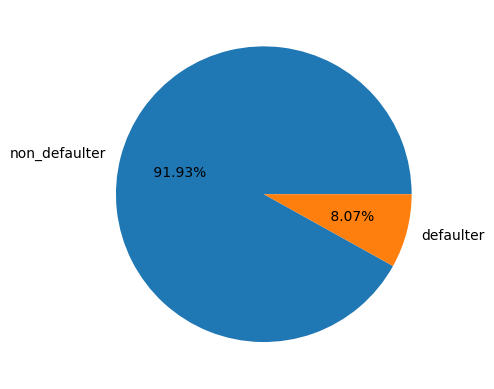

In [6]:
import matplotlib.pyplot as plt
Application.TARGET.value_counts(normalize=True).plot.pie(autopct = lambda pct: f'{pct: .2f}%', labels= ["non_defaulter", "defaulter"])
plt.ylabel(" ")
plt.show()

In [ ]:
print("Ratio :", round(Application.TARGET.value_counts()[0]/Application.TARGET.value_counts()[1],2), "%")

Ratio : 11.39 %


creating days column list

In [ ]:
day_col = [col for col in Application.columns if "DAY" in col]
day_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'WEEKDAY_APPR_PROCESS_START',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_DAY']

In [ ]:
Application[day_col].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY
0,-9461,-637,-3648.0,-2120,WEDNESDAY,-1134.0,0.0
1,-16765,-1188,-1186.0,-291,MONDAY,-828.0,0.0
2,-19046,-225,-4260.0,-2531,MONDAY,-815.0,0.0
3,-19005,-3039,-9833.0,-2437,WEDNESDAY,-617.0,NaN
4,-19932,-3038,-4311.0,-3458,THURSDAY,-1106.0,0.0


since some of the columns have -ve values, let's convert these columns to +ve

In [ ]:
Application['DAYS_BIRTH'] = Application['DAYS_BIRTH'].abs()
Application['DAYS_EMPLOYED'] = Application['DAYS_EMPLOYED'].abs()
Application['DAYS_REGISTRATION'] = Application['DAYS_REGISTRATION'].abs()
Application['DAYS_ID_PUBLISH'] = Application['DAYS_ID_PUBLISH'].abs()
Application['DAYS_LAST_PHONE_CHANGE'] = Application['DAYS_LAST_PHONE_CHANGE'].abs()
Application[day_col].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY
0,9461,637,3648.0,2120,WEDNESDAY,1134.0,0.0
1,16765,1188,1186.0,291,MONDAY,828.0,0.0
2,19046,225,4260.0,2531,MONDAY,815.0,0.0
3,19005,3039,9833.0,2437,WEDNESDAY,617.0,NaN
4,19932,3038,4311.0,3458,THURSDAY,1106.0,0.0


MISSING VALUES OR NANs

In [ ]:
import pandas as pd
Application = pd.read_csv('application_data.csv')
print(f"\nRows Size  :{Application.shape[0]}\nColumns Size  : {Application.shape[1]}")
Application.isnull().sum()


Rows Size  :307511
Columns Size  : 122


,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [ ]:
null_percentage = Application.isnull().sum()*100/len(Application)
null_percentage_major = null_percentage[null_percentage>=40]
null_percentage_major

,0
OWN_CAR_AGE,65.990810
EXT_SOURCE_1,56.381073
APARTMENTS_AVG,50.749729
BASEMENTAREA_AVG,58.515956
YEARS_BEGINEXPLUATATION_AVG,48.781019
YEARS_BUILD_AVG,66.497784
COMMONAREA_AVG,69.872297
ELEVATORS_AVG,53.295980
ENTRANCES_AVG,50.348768
FLOORSMAX_AVG,49.760822


In [ ]:
Application_df = Application.drop(columns=null_percentage_major.index)
Application_df.shape

(307511, 73)

In [ ]:
len(Application_df)

307511

In [ ]:
rows_NAN = Application_df.isnull().sum(axis=1)/Application_df.shape[1]
rows_NAN[rows_NAN > 50]

,0


In [ ]:
null_percentage_minor = null_percentage[(null_percentage <=15) & (null_percentage > 0)].sort_values(ascending=False)
null_percentage_minor

,0
AMT_REQ_CREDIT_BUREAU_HOUR,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
AMT_REQ_CREDIT_BUREAU_MON,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
NAME_TYPE_SUITE,0.420148
OBS_30_CNT_SOCIAL_CIRCLE,0.332021
DEF_30_CNT_SOCIAL_CIRCLE,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,0.332021


for colunmns with around 13 Percent missing values, we will check them individually

In [ ]:
Application_df[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_HOUR']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
 6   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
dtypes: float64(7)
memory usage: 16.4 MB


In [ ]:
Application_df[['EXT_SOURCE_2', 'EXT_SOURCE_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EXT_SOURCE_2  306851 non-null  float64
 1   EXT_SOURCE_3  246546 non-null  float64
dtypes: float64(2)
memory usage: 4.7 MB


In [ ]:
Application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [ ]:
Application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Application_df.nunique().sort_values()

,0
REG_CITY_NOT_LIVE_CITY,2
FLAG_EMAIL,2
FLAG_DOCUMENT_9,2
REG_REGION_NOT_LIVE_REGION,2
REG_REGION_NOT_WORK_REGION,2
...,...
AMT_ANNUITY,13672
DAYS_REGISTRATION,15688
DAYS_BIRTH,17460
EXT_SOURCE_2,119831


In [ ]:
import pandas as pd
Application = pd.read_csv('application_data.csv')
print(f"\nRows Size  :{Application.shape[0]}\nColumns Size  : {Application.shape[1]}")
Application.head()
null_percentage = Application.isnull().sum()*100/len(Application)
null_percentage_major = null_percentage[null_percentage>=40]
Application_df = Application.drop(columns=null_percentage_major.index)
useless_cols = ['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_EMAIL', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

Application_df.drop(columns=useless_cols, inplace=True)
Application_df.shape
Application_df.nunique().sort_values().index

# we will check gender column
Application_df['CODE_GENDER'].value_counts()


Rows Size  :27166
Columns Size  : 122


,count
CODE_GENDER,
F,17900
M,9266


In [ ]:
# checking AMT_INCOME_TOTAL and AMT_CREDIT variables
Application_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT
count,2.716600e+04,2.716600e+04
mean,1.727825e+05,6.005350e+05
std,7.157358e+05,4.018832e+05
min,2.565000e+04,4.500000e+04
25%,1.125000e+05,2.700000e+05
50%,1.449000e+05,5.185620e+05
75%,2.025000e+05,8.086500e+05
max,1.170000e+08,4.050000e+06


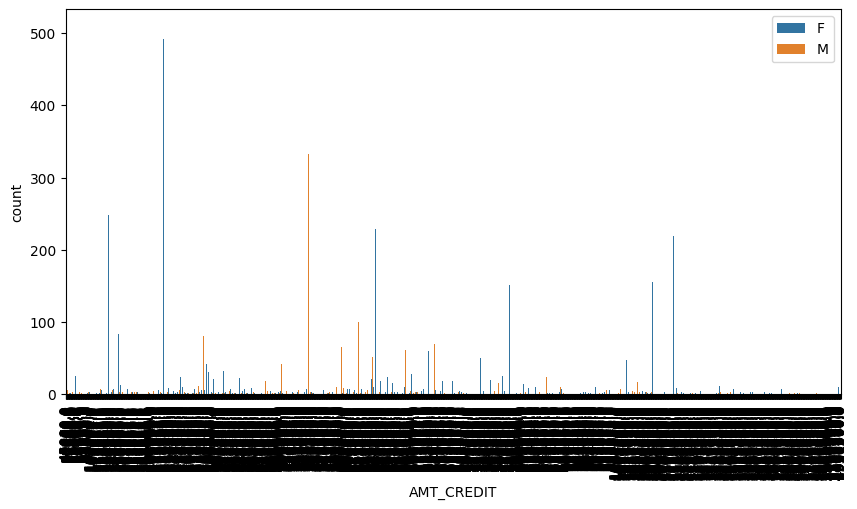

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(data=Application_df, x= 'AMT_CREDIT', hue = 'CODE_GENDER')
plt.xticks(rotation= 90)
plt.legend(loc='upper right')
plt.show()

In [ ]:
#checking for outliers
Application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,27166.000000,27166.000000,27166.000000,2.716600e+04,2.716600e+04,27166.000000,2.714400e+04,27166.000000,27166.000000,27166.000000,...,27070.000000,27070.000000,27070.000000,27070.000000,23532.000000,23532.000000,23532.000000,23532.000000,23531.000000,23531.000000
mean,115824.507730,0.080063,0.417065,1.727825e+05,6.005350e+05,27157.110230,5.398878e+05,0.020801,-16033.847456,63790.226607,...,1.429959,0.145475,1.413225,0.101182,0.006969,0.007607,0.033401,0.272225,0.262335,1.886958
std,9123.754807,0.271396,0.723832,7.157358e+05,4.018832e+05,14653.348609,3.695203e+05,0.013797,4361.745567,141275.465218,...,2.325285,0.447846,2.306309,0.364473,0.085211,0.111327,0.197057,0.939641,0.612090,1.862659
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25182.000000,-16365.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,107921.250000,0.000000,0.000000,1.125000e+05,2.700000e+05,16506.000000,2.385000e+05,0.010006,-19674.000000,-2780.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,115828.500000,0.000000,0.000000,1.449000e+05,5.185620e+05,24997.500000,4.500000e+05,0.018850,-15754.000000,-1226.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,123769.750000,0.000000,1.000000,2.025000e+05,8.086500e+05,34678.125000,6.795000e+05,0.028663,-12374.000000,-288.000000,...,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,131575.000000,1.000000,9.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7680.000000,365243.000000,...,25.000000,6.000000,25.000000,5.000000,2.000000,5.000000,5.000000,24.000000,8.000000,25.000000


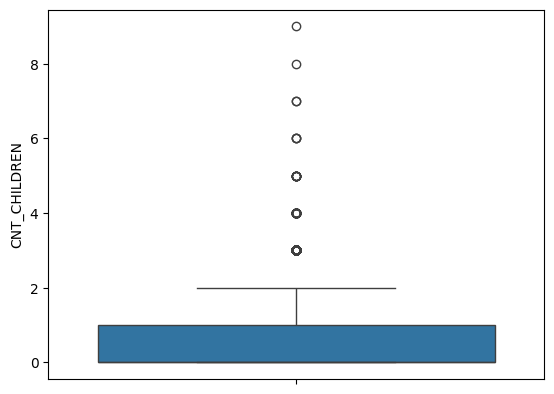

In [ ]:
# the column CNT_CHILDREN has outliers
sns.boxplot(Application_df['CNT_CHILDREN'])
plt.show()

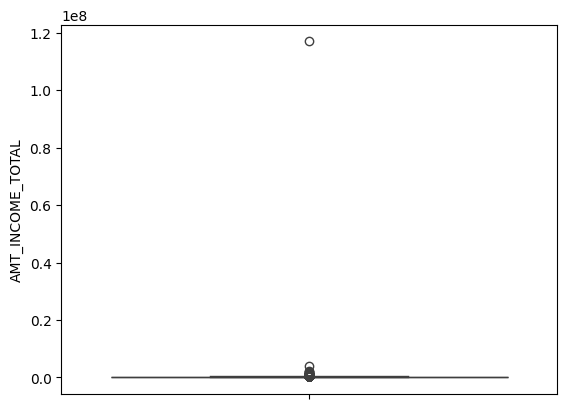

In [ ]:
#the column AMT_INCOME_TOTAL outliers
sns.boxplot(Application_df['AMT_INCOME_TOTAL'])
plt.show()

In [ ]:
Application_df[Application_df['AMT_INCOME_TOTAL'] == Application_df['AMT_INCOME_TOTAL'].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


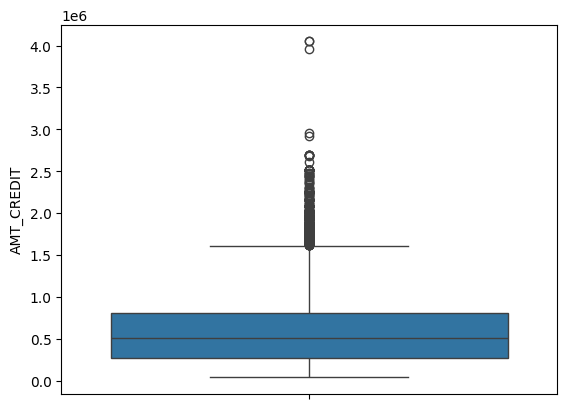

In [ ]:
sns.boxplot(Application_df['AMT_CREDIT'])
plt.show()

In [ ]:
Application_df[Application_df['AMT_CREDIT'] == Application_df['AMT_CREDIT'].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
14852,117337,0,Cash loans,M,N,Y,1,760846.5,4050000.0,146002.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


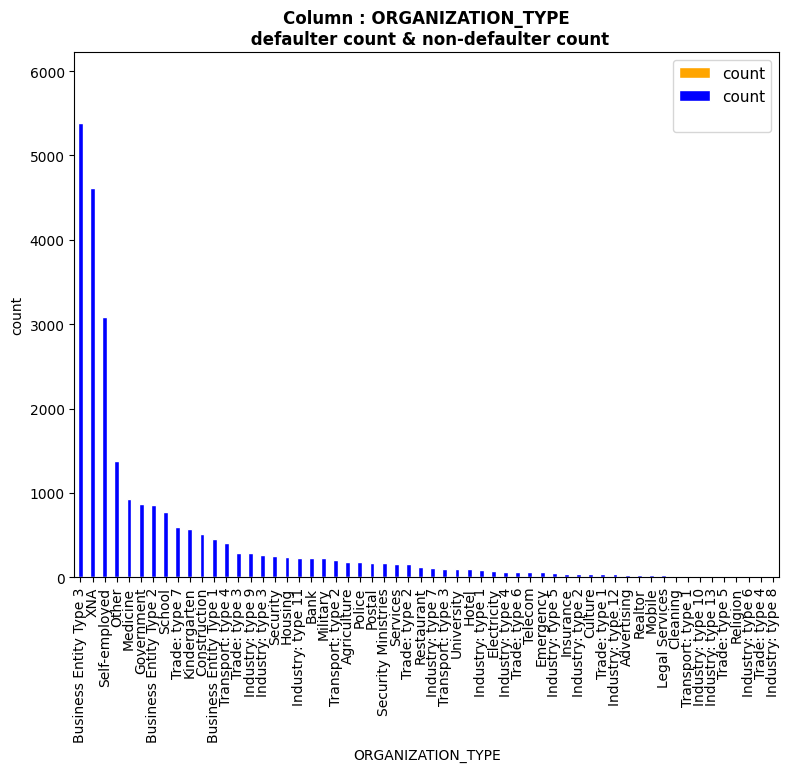

In [ ]:
#plotting ORGANIZATION_TYPE
default = Application_df[Application_df['TARGET'] == 1]
non_default = Application_df[Application_df['TARGET'] == 0]
#plotting ORGANIZATION_TYPE
default = Application_df[Application_df['TARGET'] == 1]
non_default = Application_df[Application_df['TARGET'] == 0]
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
default["ORGANIZATION_TYPE"].value_counts().plot.bar(stacked=True, color = "orange", edgecolor = "white", width= 0.4)
non_default["ORGANIZATION_TYPE"].value_counts().plot.bar(stacked=True, color = "blue", edgecolor = "white", width= 0.4)
Application_df["ORGANIZATION_TYPE"].value_counts().plot.bar(stacked=True, alpha = 0, label =" ")
plt.title(f"Column : ORGANIZATION_TYPE\n defaulter count & non-defaulter count", weight = "bold", fontsize = 12)
plt.ylabel("count")
plt.legend(fontsize=11)
plt.title(f"Column : ORGANIZATION_TYPE\n defaulter count & non-defaulter count", weight = "bold", fontsize = 12)
plt.ylabel("count")
plt.legend(fontsize=11)

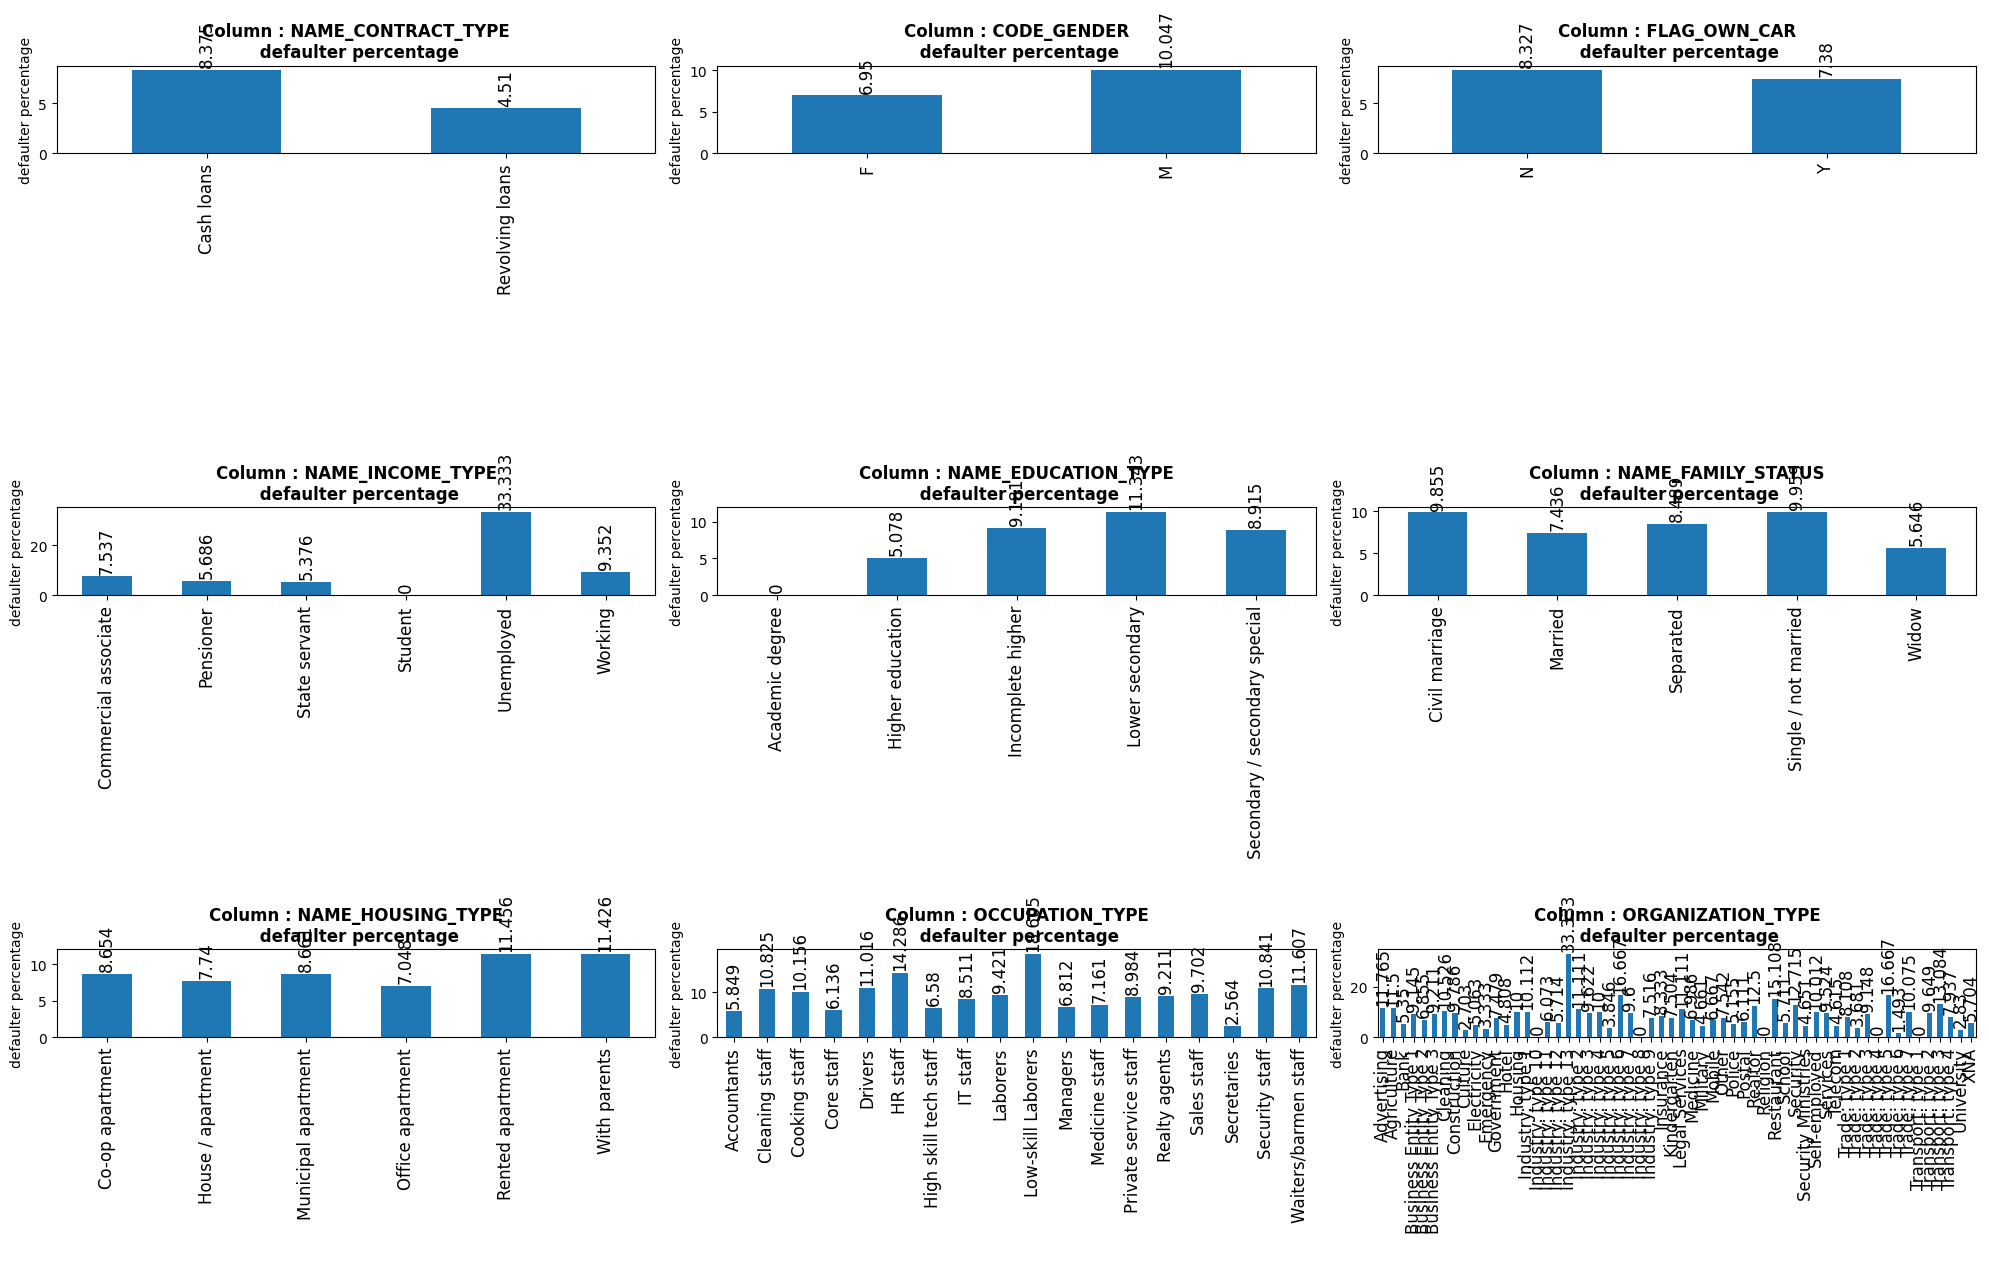

In [ ]:
#percentage of defaulter
plt.figure(figsize=(20,15))
ddf = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']
for index, col in enumerate(ddf):
  plt.subplot(len(ddf)//2,3,index+1)
  ax = round(Application_df.groupby(col).TARGET.mean()*100, 3).plot(kind = 'bar')
  ax.bar_label(ax.containers[0], padding = 2, rotation = 90, fontsize = 12)
  plt.title(f"Column : {col}\n defaulter percentage", weight = "bold", fontsize = 12)
  plt.ylabel("defaulter percentage")
  plt.xlabel(" ")
  plt.xticks(fontsize = 12)
  plt.tight_layout()

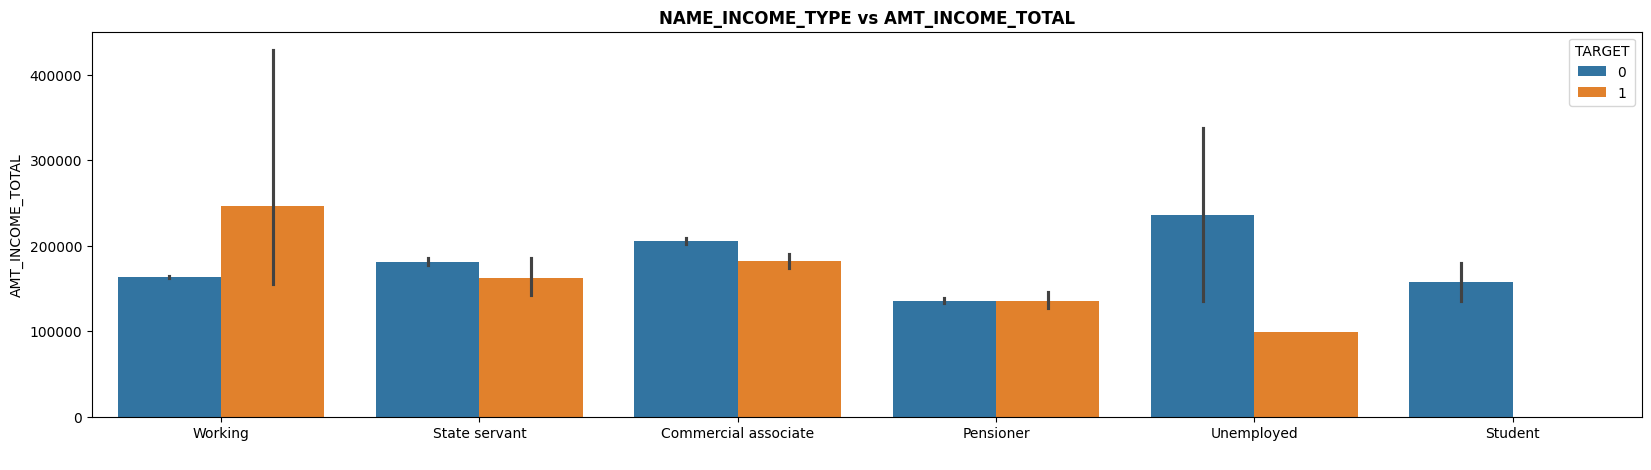

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x = "NAME_INCOME_TYPE", y = "AMT_INCOME_TOTAL", hue = "TARGET", data = Application_df)
plt.title("NAME_INCOME_TYPE vs AMT_INCOME_TOTAL", weight = "bold", fontsize = 12)
plt.xlabel(" ")
plt.show()

In [ ]:
# Reading prev_application
import pandas as pd
prev_application = pd.read_csv('previous_application.csv')
print(prev_application.shape)
prev_application.head()

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
prev_application.SK_ID_CURR.value_counts().head()

,count
SK_ID_CURR,
187868,77
265681,73
173680,72
242412,68
206783,67


In [ ]:
prev_application.SK_ID_PREV.value_counts().head()

,count
SK_ID_PREV,
2030495,1
1035848,1
1526498,1
2148893,1
2437429,1


In [ ]:
curr_prev = pd.merge(left=Application_df, right=prev_application, how='inner', on='SK_ID_CURR')
curr_prev.shape

(124461, 78)

In [ ]:
curr_prev.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [ ]:
curr_prev['NAME_CONTRACT_STATUS'].value_counts()*100/len(curr_prev)

,count
NAME_CONTRACT_STATUS,
Approved,62.618009
Canceled,18.378448
Refused,17.333944
Unused offer,1.669599


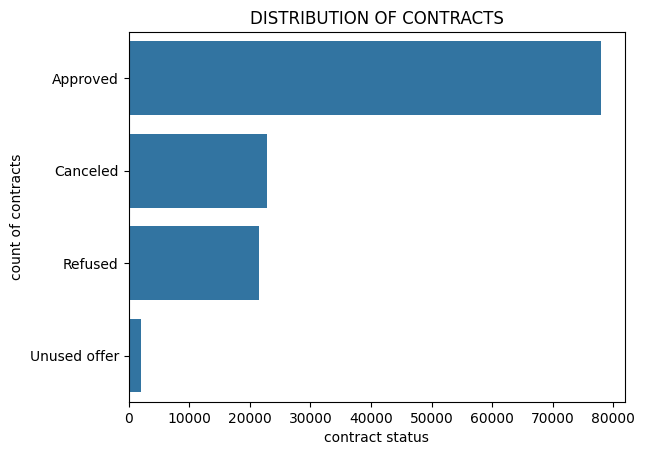

In [ ]:
sns.countplot(curr_prev['NAME_CONTRACT_STATUS'])
plt.xlabel("contract status")
plt.ylabel("count of contracts")
plt.title("DISTRIBUTION OF CONTRACTS")
plt.show()